BASELINE MODEL WITH SVM

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [4]:

df = pd.read_csv("../data/processed/balanced_df.csv")

X = df['text'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y   
)

print(f"Train Size: {len(X_train)}, Test Size: {len(X_test)}")

Train Size: 136184, Test Size: 34046


In [5]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=25000,
    ngram_range=(1,2),
    sublinear_tf=True
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print(f'Train TF-IDF shape: {X_train_vec.shape}')

Train TF-IDF shape: (136184, 25000)


In [6]:
svm_clf = LinearSVC(
    C = 1.0,
    class_weight='balanced',
    max_iter=5000
)

svm_clf.fit(X_train_vec,y_train)

LinearSVC(class_weight='balanced', max_iter=5000)

              precision    recall  f1-score   support

        FAKE     0.9992    0.2777    0.4347     17023
        REAL     0.5806    0.9998    0.7346     17023

    accuracy                         0.6388     34046
   macro avg     0.7899    0.6388    0.5846     34046
weighted avg     0.7899    0.6388    0.5846     34046



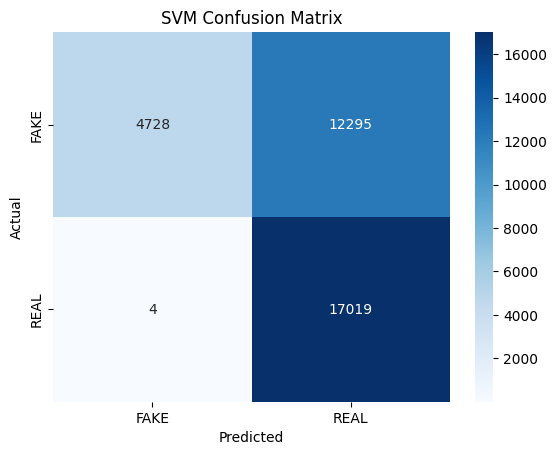

In [7]:
y_pred = svm_clf.predict(X_test_vec)

print(classification_report(y_test,y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',
            xticklabels=svm_clf.classes_,yticklabels=svm_clf.classes_)
plt.title("SVM Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()